In [29]:
import pandas as pd
import json
import os 
import sys
import csv

# plot
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# dir = os.path.join('dataset', 'kaggle-dse')
# dir = r"/Users/md.raihansobhan/Desktop/BUET/4-2 Sessionals/CSE 472 | ML/online_class/Strategic-Stock-Trading-with-Deep-Reinforcement-Learning-Models/datasets/NIFTY"

if os.name == 'nt':  # Windows
    dir = r"D:\Academics\4-2\19 Batch\Sessionals\CSE 472\Project\1905095_1905115\Github\Strategic-Stock-Trading-with-Deep-Reinforcement-Learning-Models\datasets\SNP_500\D1"
else:  # macOS/Linux
    dir = r"/Users/md.raihansobhan/Desktop/BUET/4-2 Sessionals/CSE 472 | ML/online_class/Strategic-Stock-Trading-with-Deep-Reinforcement-Learning-Models/datasets/SNP_500/D1"


files = os.listdir(dir)
files.sort()
files = [f for f in files if f not in ['sp500_companies.csv', 'sp500_index.csv']]
print(files)

['A.US_D1.csv', 'AAL.US_D1.csv', 'AAPL.US_D1.csv', 'ABBV.US_D1.csv', 'ABNB.US_D1.csv', 'ABT.US_D1.csv', 'ACGL.US_D1.csv', 'ACN.US_D1.csv', 'ADBE.US_D1.csv', 'ADI.US_D1.csv', 'ADM.US_D1.csv', 'ADP.US_D1.csv', 'ADSK.US_D1.csv', 'AEE.US_D1.csv', 'AEP.US_D1.csv', 'AES.US_D1.csv', 'AFL.US_D1.csv', 'AIG.US_D1.csv', 'AIZ.US_D1.csv', 'AJG.US_D1.csv', 'AKAM.US_D1.csv', 'ALB.US_D1.csv', 'ALGN.US_D1.csv', 'ALL.US_D1.csv', 'ALLE.US_D1.csv', 'AMAT.US_D1.csv', 'AMCR.US_D1.csv', 'AMD.US_D1.csv', 'AME.US_D1.csv', 'AMGN.US_D1.csv', 'AMP.US_D1.csv', 'AMT.US_D1.csv', 'AMZN.US_D1.csv', 'ANET.US_D1.csv', 'ANSS.US_D1.csv', 'AON.US_D1.csv', 'AOS.US_D1.csv', 'APA.US_D1.csv', 'APD.US_D1.csv', 'APH.US_D1.csv', 'APTV.US_D1.csv', 'ARE.US_D1.csv', 'ASML.US_D1.csv', 'ATO.US_D1.csv', 'AVB.US_D1.csv', 'AVGO.US_D1.csv', 'AVY.US_D1.csv', 'AWK.US_D1.csv', 'AXON.US_D1.csv', 'AXP.US_D1.csv', 'AZN.US_D1.csv', 'AZO.US_D1.csv', 'BA.US_D1.csv', 'BAC.US_D1.csv', 'BALL.US_D1.csv', 'BAX.US_D1.csv', 'BBWI.US_D1.csv', 'BBY.US_D1.c

In [32]:
# Add Symbol column to each csv
# Process each file
for file_name in files:
    # Extract the company symbol from the file name
    symbol = file_name.split('.')[0]  # Extract everything before "_"
    
    # Load the CSV file
    file_path = os.path.join(dir, file_name)
    df = pd.read_csv(file_path)
    
    # Add the 'Symbol' column
    df['Symbol'] = symbol
    
    # Save the updated CSV to the output folder
    output_path = os.path.join(dir, file_name)
    df.to_csv(output_path, index=False)



In [33]:
# List to store the data from all CSV files
data = []

# Loop through the files
for f in files:
    # Load each CSV file into a DataFrame and append to the list
    file_path = os.path.join(dir, f)
    data.append(pd.read_csv(file_path))

# Check the number of loaded CSV files
len(data)

519

In [34]:
# convert to pandas dataframe
dfs = []
for i in range(1,len(data)):
    dfs.append(pd.DataFrame(data[i]))
df = pd.concat(dfs)

In [35]:
df.shape

(2789187, 7)

In [36]:
df

,datetime,open,high,low,close,volume,Symbol
0,2013-12-09,23.90,25.44,23.45,24.96,20698322,AAL
1,2013-12-10,24.53,25.17,24.41,24.88,16285283,AAL
2,2013-12-11,25.44,27.19,25.37,25.99,31194241,AAL
3,2013-12-12,26.20,26.72,25.45,25.50,19006600,AAL
4,2013-12-13,25.61,26.31,25.52,26.30,10829193,AAL
...,...,...,...,...,...,...,...
2839,2024-03-08,181.59,182.98,179.84,182.53,5194409,ZTS
2840,2024-03-09,182.52,182.53,182.13,182.16,611363,ZTS
2841,2024-03-11,182.62,183.99,180.42,183.49,2648357,ZTS
2842,2024-03-12,183.65,183.83,180.94,181.35,1931447,ZTS


In [37]:
df.rename(columns={'datetime':'date', 'Symbol': 'tic'}, inplace=True)


In [38]:
df 

,date,open,high,low,close,volume,tic
0,2013-12-09,23.90,25.44,23.45,24.96,20698322,AAL
1,2013-12-10,24.53,25.17,24.41,24.88,16285283,AAL
2,2013-12-11,25.44,27.19,25.37,25.99,31194241,AAL
3,2013-12-12,26.20,26.72,25.45,25.50,19006600,AAL
4,2013-12-13,25.61,26.31,25.52,26.30,10829193,AAL
...,...,...,...,...,...,...,...
2839,2024-03-08,181.59,182.98,179.84,182.53,5194409,ZTS
2840,2024-03-09,182.52,182.53,182.13,182.16,611363,ZTS
2841,2024-03-11,182.62,183.99,180.42,183.49,2648357,ZTS
2842,2024-03-12,183.65,183.83,180.94,181.35,1931447,ZTS


In [39]:
df.shape

(2789187, 7)

In [40]:
# count the unique values in the column
df = df.drop_duplicates(subset=['date', 'tic'])
df.shape

(2789187, 7)

In [41]:
df = df.dropna(subset=['date', 'tic'])
df.shape

(2789187, 7)

In [42]:
nan_counts = df.isna().sum()
print(nan_counts)


date      0
open      0
high      0
low       0
close     0
volume    0
tic       0
dtype: int64


In [43]:
# print the zero count of each column
zero_counts = df.apply(lambda x: (x==0).sum())
print(zero_counts)

date        0
open        0
high        0
low         1
close       0
volume    909
tic         0
dtype: int64


In [44]:
df = df[df['low'] != 0]
df = df[df['volume'] != 0]


In [45]:
# print the zero count of each column
zero_counts = df.apply(lambda x: (x==0).sum())
print(zero_counts)

date      0
open      0
high      0
low       0
close     0
volume    0
tic       0
dtype: int64


In [46]:
df['tic'].value_counts()

tic
MCD     6639
BSX     6639
PPL     6639
CL      6639
USB     6639
        ... 
CEG      224
KVUE     221
RVTY     213
EG       177
BALL     121
Name: count, Length: 518, dtype: int64

In [47]:
import pandas as pd

# Get the value counts of the 'tic' column
tic_counts = df['tic'].value_counts(dropna=False)

# Convert the counts to a DataFrame
tic_counts_df = tic_counts.reset_index()
tic_counts_df.columns = ['Tic', 'Count']

# Save the DataFrame to a CSV file
tic_counts_df.to_csv('tic_value_counts.csv', index=False)

print(tic_counts)


tic
MCD     6639
BSX     6639
PPL     6639
CL      6639
USB     6639
        ... 
CEG      224
KVUE     221
RVTY     213
EG       177
BALL     121
Name: count, Length: 518, dtype: int64


In [48]:
top_companies = [
    "JPM",  # JPMorgan Chase
    "BAC",  # Bank of America
    "C",    # Citigroup
    "GS",   # Goldman Sachs
    "AXP",  # American Express
    "BLK",  # BlackRock
    "USB",  # U.S. Bancorp
    "PNC",  # PNC Financial Services
    "STT",  # State Street Corporation
    "SCHW", # Charles Schwab
    "AIG",  # American International Group
    "TROW", # T. Rowe Price
    "FITB", # Fifth Third Bancorp
    "KEY",  # KeyCorp
    "COF",  # Capital One Financial
    "HBAN", # Huntington Bancshares
    "BK",   # The Bank of New York Mellon
    "ZION", # Zions Bancorporation
    "CMA",  # Comerica
    "MTB",  # M&T Bank
    "NTRS", # Northern Trust
    "RF",   # Regions Financial
    "RJF",  # Raymond James Financial
    "AMT",  # American Tower
    "NVDA", # NVIDIA
    "MSFT", # Microsoft
    "AAPL", # Apple
    "AMZN", # Amazon
    "INTC", # Intel
    "AMD",  # Advanced Micro Devices
    "PFE",  # Pfizer
    "JNJ",  # Johnson & Johnson
    "MMM",  # 3M
    "GE",   # General Electric
    "BA",   # Boeing
    "CAT",  # Caterpillar
    "DE",   # Deere & Company
    "HON",  # Honeywell
    "WMT",  # Walmart
    "NEE",  # NextEra Energy
]

print(len(top_companies))  # This will output: 40


40


In [49]:
# Get the top 30 most frequent 'tic' values
top_40_tics = top_companies

# Filter the DataFrame to keep only these top 30 'tic' values
df_filtered = df[df['tic'].isin(top_40_tics)]

df = df_filtered.reset_index(drop=True)
# Display the filtered DataFrame
print(df)


              date   open   high    low  close     volume   tic
0       1998-01-02   0.12   0.14   0.12   0.14  170539824  AAPL
1       1998-01-05   0.14   0.14   0.13   0.14  152723900  AAPL
2       1998-01-06   0.14   0.17   0.13   0.16  433041952  AAPL
3       1998-01-07   0.16   0.16   0.15   0.15  251914152  AAPL
4       1998-01-08   0.15   0.16   0.15   0.16  188994988  AAPL
...            ...    ...    ...    ...    ...        ...   ...
262423  2024-03-08  41.53  42.95  41.52  42.23    1605125  ZION
262424  2024-03-09  42.24  42.25  42.24  42.24        752  ZION
262425  2024-03-11  42.17  42.44  41.24  41.62    1497079  ZION
262426  2024-03-12  41.66  42.04  40.68  40.90    1588071  ZION
262427  2024-03-13  40.88  41.37  40.70  41.09    1027120  ZION

[262428 rows x 7 columns]


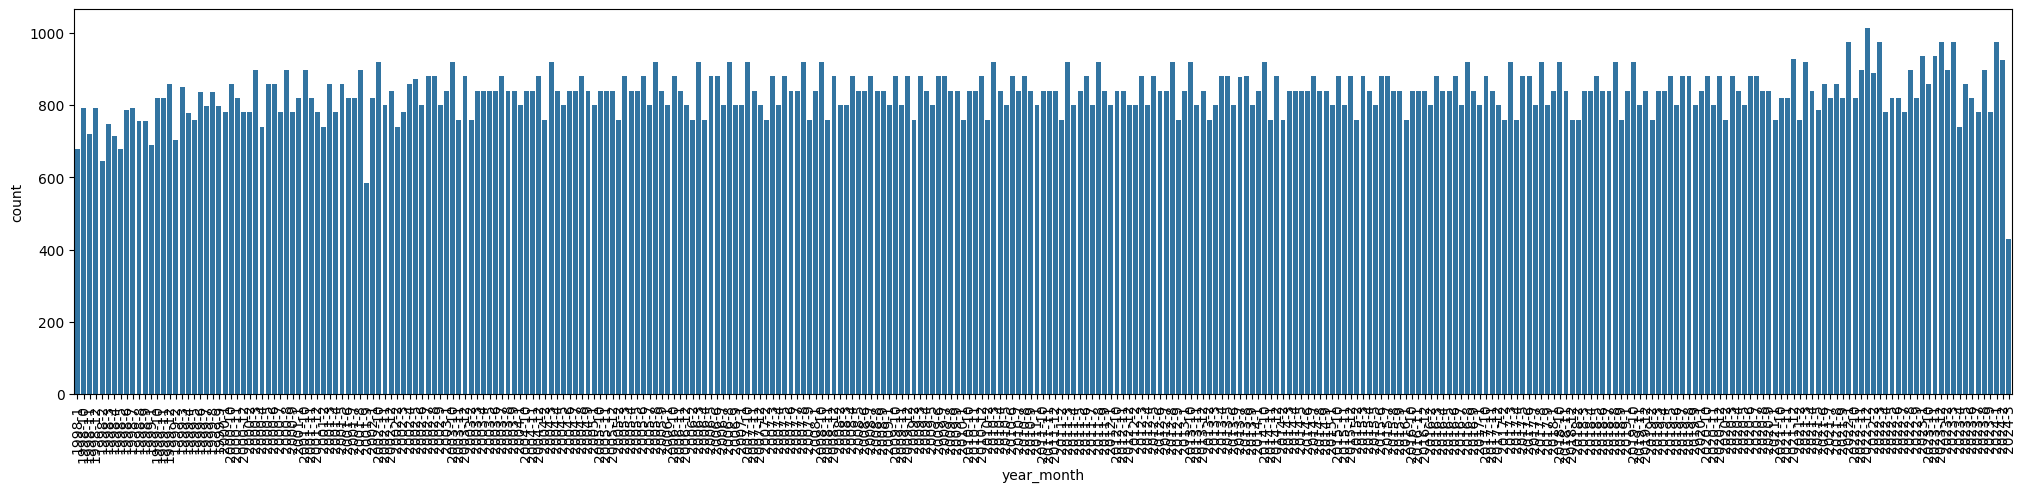

In [50]:
# per year minimum number of trading days
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Create a new column 'year_month' for plotting
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str)

plt.figure(figsize=(25, 5))
sns.countplot(x='year_month', data=df, order=sorted(df['year_month'].unique()))
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

In [51]:
df['year'].value_counts()

year
2022    10483
2023    10451
2008    10120
2020    10120
2019    10080
2016    10080
2015    10080
2014    10080
2009    10080
2011    10080
2005    10080
2004    10080
2003    10080
2010    10080
2013    10079
2007    10040
2006    10040
2017    10040
2018    10040
2012    10000
2002     9991
2021     9987
2000     9828
2001     9672
1999     9544
1998     8864
2024     2329
Name: count, dtype: int64

In [52]:
# print df['year'].value_counts() but in year wise sort

year_counts = df['year'].value_counts().sort_index()
print(year_counts)

year
1998     8864
1999     9544
2000     9828
2001     9672
2002     9991
2003    10080
2004    10080
2005    10080
2006    10040
2007    10040
2008    10120
2009    10080
2010    10080
2011    10080
2012    10000
2013    10079
2014    10080
2015    10080
2016    10080
2017    10040
2018    10040
2019    10080
2020    10120
2021     9987
2022    10483
2023    10451
2024     2329
Name: count, dtype: int64


In [53]:
import pandas as pd

# Ensure 'date' is properly converted to datetime
df['date'] = pd.to_datetime(df['date'])

# Create an empty DataFrame to store the sampled data
sampled_data = pd.DataFrame()

# Group the data by year
grouped_data = df.groupby('year')

# Sample days dynamically based on the number of unique days available in each year
for year, group in grouped_data:
    # Get the unique dates available for sampling
    unique_days = group['date'].nunique()
    print('ud '+ str(year)+ ' ' + str(unique_days))
    
    # Adjust the sample size based on the number of unique days
    sample_size = min(208, unique_days)  # Use smaller of 208 or the number of unique days
    
    # Sample unique days
    sampled_days = group['date'].sample(sample_size, replace=False)
    

    print('ss '+ str(year)+ ' ' + str(sample_size))

    # Filter the data for the sampled days
    sampled_year_data = group[group['date'].isin(sampled_days)]
    
    # Ensure each sampled day includes all 30 trading codes
    sampled_year_data = sampled_year_data.groupby('date').filter(lambda x: len(x) == 30)
    
    # Append the sampled data to the final DataFrame
    sampled_data = pd.concat([sampled_data, sampled_year_data])

# Reset index of the final sampled data
sampled_data.reset_index(drop=True, inplace=True)

print(len(sampled_data))


ud 1998 252
ss 1998 208
ud 1999 252
ss 1999 208
ud 2000 252
ss 2000 208
ud 2001 248
ss 2001 208
ud 2002 252
ss 2002 208
ud 2003 252
ss 2003 208
ud 2004 252
ss 2004 208
ud 2005 252
ss 2005 208
ud 2006 251
ss 2006 208
ud 2007 251
ss 2007 208
ud 2008 253
ss 2008 208
ud 2009 252
ss 2009 208
ud 2010 252
ss 2010 208
ud 2011 252
ss 2011 208
ud 2012 250
ss 2012 208
ud 2013 252
ss 2013 208
ud 2014 252
ss 2014 208
ud 2015 252
ss 2015 208
ud 2016 252
ss 2016 208
ud 2017 251
ss 2017 208
ud 2018 251
ss 2018 208
ud 2019 252
ss 2019 208
ud 2020 253
ss 2020 208
ud 2021 254
ss 2021 208
ud 2022 269
ss 2022 208
ud 2023 268
ss 2023 208
ud 2024 60
ss 2024 60
0


In [54]:
# Count zeros in the 'Volume' column
zero_count_volume = (df['volume'] == 0).sum()

print("Number of zeros in 'Volume' column:", zero_count_volume)


Number of zeros in 'Volume' column: 0


In [55]:
# print the zero count of each column
zero_counts = df.apply(lambda x: (x==0).sum())
print(zero_counts)

date          0
open          0
high          0
low           0
close         0
volume        0
tic           0
year          0
month         0
year_month    0
dtype: int64


In [56]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from stable_baselines3.common.logger import configure
from finrl.meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from pprint import pprint

import sys
sys.path.append("../FinRL")

import itertools

from finrl import config
from finrl import config_tickers
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)
check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

c:\Users\jamil\AppData\Local\Programs\Python\Python310\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [57]:
df.head()

,date,open,high,low,close,volume,tic,year,month,year_month
0,1998-01-02,0.12,0.14,0.12,0.14,170539824,AAPL,1998,1,1998-1
1,1998-01-05,0.14,0.14,0.13,0.14,152723900,AAPL,1998,1,1998-1
2,1998-01-06,0.14,0.17,0.13,0.16,433041952,AAPL,1998,1,1998-1
3,1998-01-07,0.16,0.16,0.15,0.15,251914152,AAPL,1998,1,1998-1
4,1998-01-08,0.15,0.16,0.15,0.16,188994988,AAPL,1998,1,1998-1


In [58]:
df.drop(['year_month','month','year'], axis=1, inplace=True)


In [59]:
df

,date,open,high,low,close,volume,tic
0,1998-01-02,0.12,0.14,0.12,0.14,170539824,AAPL
1,1998-01-05,0.14,0.14,0.13,0.14,152723900,AAPL
2,1998-01-06,0.14,0.17,0.13,0.16,433041952,AAPL
3,1998-01-07,0.16,0.16,0.15,0.15,251914152,AAPL
4,1998-01-08,0.15,0.16,0.15,0.16,188994988,AAPL
...,...,...,...,...,...,...,...
262423,2024-03-08,41.53,42.95,41.52,42.23,1605125,ZION
262424,2024-03-09,42.24,42.25,42.24,42.24,752,ZION
262425,2024-03-11,42.17,42.44,41.24,41.62,1497079,ZION
262426,2024-03-12,41.66,42.04,40.68,40.90,1588071,ZION


In [60]:
# Assuming 'df' is your DataFrame and 'close' is the column with closing prices
std_dev = df.groupby('tic')['close'].std()

plt.figure(figsize=(10,6))
sns.histplot(std_dev, bins=50, kde=True)
plt.title('Distribution of std of the stocks')
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.savefig('output.png')
plt.show()

C:\Users\jamil\AppData\Local\Temp\ipykernel_2088\2605565239.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [61]:
df['day'] = pd.to_datetime(df['date']).dt.dayofweek
df['short_resistance']= df['high'].rolling(window=10,min_periods=0).max()
df['short_support']= df['low'].rolling(window=10,min_periods=0).min()
df['long_resistance']= df['high'].rolling(window=50,min_periods=0).max()
df['long_support']= df['low'].rolling(window=50,min_periods=0).min()
df = df.reset_index(drop=True)
df = df.sort_values(by=['date','tic']).reset_index(drop=True)

In [62]:
df.dtypes

date                datetime64[ns]
open                       float64
high                       float64
low                        float64
close                      float64
volume                       int64
tic                         object
day                          int32
short_resistance           float64
short_support              float64
long_resistance            float64
long_support               float64
dtype: object

In [63]:
# convert datetime to string
df['date'] = df['date'].dt.strftime('%Y-%m-%d')

In [64]:
print(df.shape)
df.tail()

(262428, 12)


,date,open,high,low,close,volume,tic,day,short_resistance,short_support,long_resistance,long_support
262423,2024-03-13,72.52,73.64,72.52,72.85,1406490,STT,2,74.95,71.59,79.90,70.53
262424,2024-03-13,118.00,118.82,117.47,117.60,627235,TROW,2,119.48,113.46,119.48,103.40
262425,2024-03-13,43.23,44.07,43.23,43.47,4678790,USB,2,44.07,41.42,44.07,38.87
262426,2024-03-13,61.26,61.46,60.88,61.28,12679050,WMT,2,61.57,58.40,171.07,58.18
262427,2024-03-13,40.88,41.37,40.70,41.09,1027120,ZION,2,42.95,38.74,45.33,37.76


In [65]:
data = df.copy()
df_price_pivot = data.pivot(index="date", columns="tic", values="close")
df_price_pivot = df_price_pivot.pct_change()
unique_date = data.date.unique()
# start after a year
start = 208
turbulence_index = [0] * start
# turbulence_index = [0]
count = 0
for i in range(start, len(unique_date)):
  current_price = df_price_pivot[df_price_pivot.index == unique_date[i]]
  # use one year rolling window to calcualte covariance
  hist_price = df_price_pivot[
      (df_price_pivot.index < unique_date[i])
      & (df_price_pivot.index >= unique_date[i - 208])
  ]
  # Drop tickers which has number missing values more than the "oldest" ticker
  filtered_hist_price = hist_price.iloc[
      hist_price.isna().sum().min() :
  ].dropna(axis=1)

  cov_temp = filtered_hist_price.cov()
  current_temp = current_price[[x for x in filtered_hist_price]] - np.mean(
      filtered_hist_price, axis=0
  )
  # cov_temp = hist_price.cov()
  # current_temp=(current_price - np.mean(hist_price,axis=0))

  temp = current_temp.values.dot(np.linalg.pinv(cov_temp)).dot(
      current_temp.values.T
  )
  if temp > 0:
      count += 1
      if count > 2:
          turbulence_temp = temp[0][0]
      else:
          # avoid large outlier because of the calculation just begins
          turbulence_temp = 0
  else:
      turbulence_temp = 0
  turbulence_index.append(turbulence_temp)
print(len(turbulence_index))
try:
  turbulence_index = pd.DataFrame(
      {"date": df_price_pivot.index, "turbulence": turbulence_index}
  )
except ValueError:
  raise Exception("Turbulence information could not be added.")

C:\Users\jamil\AppData\Local\Temp\ipykernel_2088\1344718701.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_price_pivot = df_price_pivot.pct_change()


6639


In [66]:
turbulence_index['turbulence'].max()

717004.4620180315

In [67]:
df = df.merge(turbulence_index, on="date")
df['tic'].value_counts()

tic
AAPL    6639
GE      6639
ZION    6639
USB     6639
TROW    6639
STT     6639
PNC     6639
MSFT    6639
MMM     6639
AIG     6639
JPM     6639
JNJ     6639
INTC    6639
HBAN    6639
KEY     6639
AXP     6639
C       6639
BAC     6639
AMD     6639
AMZN    6639
BA      6639
FITB    6638
DE      6638
COF     6638
CMA     6638
CAT     6638
BK      6638
NEE     6638
NTRS    6638
PFE     6638
RJF     6637
SCHW    6637
WMT     6629
MTB     6536
AMT     6533
NVDA    6374
GS      6304
BLK     6195
HON     5876
RF      5546
Name: count, dtype: int64

In [68]:
df.to_csv('df.csv', index=False)  # 'index=False' prevents pandas from writing row numbers as the first column

# df.shape
nan_counts = df.isna().sum()
print(nan_counts)


date                0
open                0
high                0
low                 0
close               0
volume              0
tic                 0
day                 0
short_resistance    0
short_support       0
long_resistance     0
long_support        0
turbulence          0
dtype: int64


In [69]:
df = df[df['date'] <= '2023-12-31']
# df

In [70]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = INDICATORS,
                    use_vix=False,
                    use_turbulence=False,
                    user_defined_feature = False)
# turbulance is giving error
df = df.fillna(value = 0)
processed = fe.preprocess_data(df)



Successfully added technical indicators


In [71]:
# df.shape
nan_counts = df.isna().sum()
print(nan_counts)


date                0
open                0
high                0
low                 0
close               0
volume              0
tic                 0
day                 0
short_resistance    0
short_support       0
long_resistance     0
long_support        0
turbulence          0
dtype: int64


In [72]:
print(processed['tic'].nunique())
print(processed.shape)

22
(144738, 21)


In [73]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)



In [74]:
tic_count = processed_full['tic'].nunique()

In [75]:
print(processed_full.shape)
processed_full.sort_values(['date','tic'],ignore_index=True).head(10)

(144738, 21)


,date,tic,open,high,low,close,volume,day,short_resistance,short_support,...,long_support,turbulence,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma
0,1998-01-02,AAPL,0.12,0.14,0.12,0.14,170539824.0,4.0,0.14,0.12,...,0.12,0.0,0.0,0.14,0.14,0.0,66.666667,100.0,0.14,0.14
1,1998-01-02,AIG,110.25,110.38,108.56,109.88,704707.0,4.0,176.90,108.56,...,108.56,0.0,0.0,0.14,0.14,0.0,66.666667,100.0,109.88,109.88
2,1998-01-02,AMD,18.25,19.26,18.19,19.26,1161511.0,4.0,76.10,18.19,...,18.19,0.0,0.0,0.14,0.14,0.0,66.666667,100.0,19.26,19.26
3,1998-01-02,AMZN,3.00,3.00,2.87,2.97,2646000.0,4.0,209.61,2.87,...,2.87,0.0,0.0,0.14,0.14,0.0,66.666667,100.0,2.97,2.97
4,1998-01-02,AXP,89.00,89.00,88.32,88.69,787901.0,4.0,180.14,88.32,...,88.32,0.0,0.0,0.14,0.14,0.0,66.666667,100.0,88.69,88.69
5,1998-01-02,BA,49.50,49.81,48.50,48.94,2465131.0,4.0,224.90,48.50,...,48.50,0.0,0.0,0.14,0.14,0.0,66.666667,100.0,48.94,48.94
6,1998-01-02,BAC,30.19,30.50,29.73,30.38,2089631.0,4.0,203.80,29.73,...,29.73,0.0,0.0,0.14,0.14,0.0,66.666667,100.0,30.38,30.38
7,1998-01-02,C,52.77,53.50,52.26,53.50,2894208.0,4.0,845.00,52.26,...,52.26,0.0,0.0,0.14,0.14,0.0,66.666667,100.0,53.50,53.50
8,1998-01-02,GE,586.48,591.03,580.00,590.55,2590614.0,4.0,591.03,34.61,...,32.29,0.0,0.0,0.14,0.14,0.0,66.666667,100.0,590.55,590.55
9,1998-01-02,HBAN,35.50,36.69,35.00,36.69,340600.0,4.0,397.49,35.00,...,35.00,0.0,0.0,0.14,0.14,0.0,66.666667,100.0,36.69,36.69


In [76]:
mvo_df = processed_full.sort_values(['date','tic'],ignore_index=True)[['date','tic','close']]

In [77]:
# Get the minimum date value from the 'date' column
min_date = processed_full['date'].min()
print(f"Minimum Date: {min_date}")

# Get the maximum date value from the 'date' column
max_date = processed_full['date'].max()
print(f"Maximum Date: {max_date}")



Minimum Date: 1998-01-02
Maximum Date: 2023-12-30


In [83]:
TRAIN_START_DATE = '1998-01-02'
TRAIN_END_DATE = '2018-12-31'
TRADE_START_DATE = '2019-01-01'
TRADE_END_DATE = '2023-12-30' ## CARE IN NIFTY
train = data_split(processed_full, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
print(len(trade))

116204
28490


In [84]:
stock_dimension = len(train.tic.unique())
# print(stock_dimension)

state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 22, State Space: 221


In [85]:
buy_cost_list = sell_cost_list = [0.0005] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 2000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
    # "cash_penalty_percentage": 0.1,
    # "exponential_cash_average": 0.04
}


e_train_gym = StockTradingEnv(df = train, **env_kwargs)

In [86]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


In [87]:
agent = DRLAgent(env = env_train)

if_using_a2c = True
if_using_ddpg = True
if_using_ppo = True
if_using_td3 = True
if_using_sac = True

In [88]:
agent = DRLAgent(env = env_train)
model_a2c = agent.get_model("a2c")

if if_using_a2c:
  # set up logger
  tmp_path = RESULTS_DIR + '/a2c'
  new_logger_a2c = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_a2c.set_logger(new_logger_a2c)


{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007}
Using cpu device
Logging to results/a2c


In [89]:
trained_a2c = agent.train_model(model=model_a2c, 
                             tb_log_name='a2c',
                             total_timesteps=5000) if if_using_a2c else None

--------------------------------------
| time/                 |            |
|    fps                | 92         |
|    iterations         | 100        |
|    time_elapsed       | 5          |
|    total_timesteps    | 500        |
| train/                |            |
|    entropy_loss       | -31.3      |
|    explained_variance | 0.0388     |
|    learning_rate      | 0.0007     |
|    n_updates          | 99         |
|    policy_loss        | -44.8      |
|    reward             | -2.1231458 |
|    std                | 1          |
|    value_loss         | 6.08       |
--------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 84         |
|    iterations         | 200        |
|    time_elapsed       | 11         |
|    total_timesteps    | 1000       |
| train/                |            |
|    entropy_loss       | -31.3      |
|    explained_variance | 0.214      |
|    learning_rate      |

In [90]:
agent = DRLAgent(env = env_train)
model_ddpg = agent.get_model("ddpg")

if if_using_ddpg:
  # set up logger
  tmp_path = RESULTS_DIR + '/ddpg'
  new_logger_ddpg = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_ddpg.set_logger(new_logger_ddpg)

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device
Logging to results/ddpg


In [91]:
trained_ddpg = agent.train_model(model=model_ddpg,
                             tb_log_name='ddpg',
                             total_timesteps=5000) if if_using_ddpg else None

In [92]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.01,
    "learning_rate": 0.00025,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

if if_using_ppo:
  # set up logger
  tmp_path = RESULTS_DIR + '/ppo'
  new_logger_ppo = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_ppo.set_logger(new_logger_ppo)

{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.00025, 'batch_size': 128}
Using cpu device
Logging to results/ppo


In [93]:
trained_ppo = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=5000) if if_using_ppo else None

------------------------------------
| time/              |             |
|    fps             | 121         |
|    iterations      | 1           |
|    time_elapsed    | 16          |
|    total_timesteps | 2048        |
| train/             |             |
|    reward          | -0.31238845 |
------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 120         |
|    iterations           | 2           |
|    time_elapsed         | 33          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.010168724 |
|    clip_fraction        | 0.138       |
|    clip_range           | 0.2         |
|    entropy_loss         | -31.2       |
|    explained_variance   | 0.00226     |
|    learning_rate        | 0.00025     |
|    loss                 | 16.2        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0114  

In [94]:
agent = DRLAgent(env = env_train)
TD3_PARAMS = {"batch_size": 100, 
              "buffer_size": 100000, 
              "learning_rate": 0.001}

model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

if if_using_td3:
  # set up logger
  tmp_path = RESULTS_DIR + '/td3'
  new_logger_td3 = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_td3.set_logger(new_logger_td3)

{'batch_size': 100, 'buffer_size': 100000, 'learning_rate': 0.001}
Using cpu device
Logging to results/td3


In [95]:
trained_td3 = agent.train_model(model=model_td3, 
                             tb_log_name='td3',
                             total_timesteps=5000) if if_using_td3 else None

In [96]:
agent = DRLAgent(env = env_train)
SAC_PARAMS = {
    "batch_size": 128,
    "buffer_size": 100000,
    "learning_rate": 0.0001,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)

if if_using_sac:
  # set up logger
  tmp_path = RESULTS_DIR + '/sac'
  new_logger_sac = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_sac.set_logger(new_logger_sac)

{'batch_size': 128, 'buffer_size': 100000, 'learning_rate': 0.0001, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cpu device
Logging to results/sac


In [97]:
trained_sac = agent.train_model(model=model_sac, 
                             tb_log_name='sac',
                             total_timesteps=5000) if if_using_sac else None

In [98]:
data_risk_indicator = processed_full[(processed_full.date<TRAIN_END_DATE) & (processed_full.date>=TRAIN_START_DATE)]
insample_risk_indicator = data_risk_indicator.drop_duplicates(subset=['date'])

In [99]:
insample_risk_indicator.turbulence.describe()

count      5282.000000
mean        206.682119
std        9874.358831
min           0.000000
25%          24.807409
50%          37.307884
75%          58.674037
max      717004.462018
Name: turbulence, dtype: float64

In [100]:
plt.figure(figsize=(10,6))
filtered_turbulence = insample_risk_indicator.turbulence[insample_risk_indicator.turbulence < 600]
sns.histplot(filtered_turbulence, bins=50, kde=True)
plt.title('Distribution of turbulence of DJI top 30 stocks')
plt.xlabel('Turbulence')
plt.ylabel('Frequency')
plt.savefig('turbulenceOFdse.png')
plt.show()

C:\Users\jamil\AppData\Local\Temp\ipykernel_2088\455132124.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [101]:
insample_risk_indicator.turbulence.quantile(0.996)

1148.9923762238238

In [102]:
e_trade_gym = StockTradingEnv(df = trade,  **env_kwargs)
# env_trade, obs_trade = e_trade_gym.get_sb_env()

In [103]:
trade.head()

,date,tic,open,high,low,close,volume,day,short_resistance,short_support,...,long_support,turbulence,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma
0,2019-01-02,AAPL,38.72,39.71,38.55,39.47,25246257.0,2.0,41.88,36.54,...,36.54,52.44292,-2.073739,45.633711,36.340289,37.754564,-91.585942,40.112990,42.265667,47.736333
0,2019-01-02,AIG,38.90,39.72,38.67,39.61,3673022.0,2.0,39.97,36.54,...,36.16,52.44292,-0.905049,41.580982,35.482018,42.321901,-23.694910,18.644134,40.185000,42.953333
0,2019-01-02,AMD,18.04,19.00,17.98,18.83,81833248.0,2.0,19.85,16.03,...,16.03,52.44292,-0.800595,22.588220,15.852780,46.035175,-52.315704,7.553950,19.560333,21.078667
0,2019-01-02,AMZN,73.26,77.66,73.04,76.97,79442300.0,2.0,79.22,65.34,...,65.34,52.44292,-2.303702,89.227554,66.587446,46.197409,-39.356278,20.061801,78.314667,82.030333
0,2019-01-02,AXP,93.91,96.27,93.77,95.68,2865401.0,2.0,102.57,89.05,...,89.05,52.44292,-3.550492,114.301392,87.414608,41.271193,-97.370445,20.678080,103.651667,104.245000


In [104]:
trained_moedl = trained_a2c
df_account_value_a2c, df_actions_a2c = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

# Save the actions DataFrame to a CSV file
df_actions_a2c.to_csv("actions_a2c.csv", index=True)  # Include index for date information


hit end!


In [105]:
trained_moedl = trained_ddpg
df_account_value_ddpg, df_actions_ddpg = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)
df_actions_ddpg.to_csv("actions_ddpg.csv", index=True)  # Include index for date information



hit end!


In [106]:
trained_moedl = trained_ppo
df_account_value_ppo, df_actions_ppo = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

hit end!


In [107]:
trained_moedl = trained_td3
df_account_value_td3, df_actions_td3 = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

hit end!


In [108]:
trained_moedl = trained_sac
df_account_value_sac, df_actions_sac = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

hit end!


In [109]:
# print max of each model
print('A2C:', df_account_value_a2c['account_value'].max())
print('DDPG:', df_account_value_ddpg['account_value'].max())
print('PPO:', df_account_value_ppo['account_value'].max())
print('TD3:', df_account_value_td3['account_value'].max())
print('SAC:', df_account_value_sac['account_value'].max())

A2C: 3558482.763095
DDPG: 4245384.606115001
PPO: 3304943.3974800017
TD3: 3372641.195015
SAC: 3786291.4285399993
